# MEANINGFUL STATISTICS FOR SOURCE 2

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats

df= pd.read_csv('Stress_Dataset.csv')

In [5]:
# Data Cleaning and Preprocessing
df.rename(columns={"Which type of stress do you primarily experience?":"stress_type"},inplace=True)
df=df[(df["Age"]>=18) & (df["Age"]<=21)]
df.reset_index(drop=True, inplace=True)

In [ ]:
# Chi-Square Test for Categorical Features
chi_results = [] # To store chi-square test results
# Analyze categorical features
feature_cols= df.columns.tolist()
feature_cols.remove('stress_type')
for col in feature_cols:
    contingency = pd.crosstab(df[col], df['stress_type'])
    chi2, p, dof, ex = stats.chi2_contingency(contingency)
    chi_results.append((col, chi2, p))
chi_df = pd.DataFrame(chi_results, columns=['Feature', 'Chi2', 'p-value'])
chi_df.sort_values(by='p-value', inplace=True)
print(chi_df)

                                              Feature        Chi2  \
3   Have you noticed a rapid heartbeat or palpitat...  107.803241   
6   Have you been dealing with anxiety or tension ...   85.397536   
7   Have you been getting headaches more often tha...   84.124463   
4   Have you been dealing with anxiety or tension ...   79.692828   
10         Have you been feeling sadness or low mood?   79.295517   
8                        Do you get irritated easily?   78.209589   
17  Is your working environment unpleasant or stre...   73.417280   
5   Do you face any sleep problems or difficulties...   73.152670   
9   Do you have trouble concentrating on your acad...   69.869504   
24                       Have you gained/lost weight?   69.474185   
18  Do you struggle to find time for relaxation an...   68.247309   
11  Have you been experiencing any illness or heal...   65.920318   
22  Academic and extracurricular activities confli...   65.810770   
20  Do you lack confidence in your

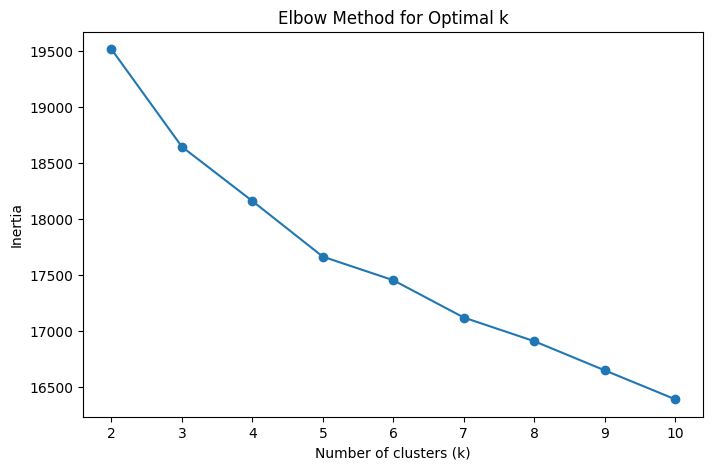

In [ ]:
# K-Means Clustering and Elbow Method
X= df[feature_cols]
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

inertia = []
k= range(2, 11)
for i in k:
    kmeans= KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(k, inertia, marker= 'o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Silhouette Scores for Different k
for k in range(2, 11):
    kmeans= KMeans(n_clusters=k, random_state=42)
    labels= kmeans.fit_predict(X_scaled)
    silhouette_avg= silhouette_score(X_scaled, labels)
    print(f'For n_clusters={k}, the average silhouette_score is : {silhouette_avg}')

For n_clusters=2, the average silhouette_score is : 0.07437969050659786
For n_clusters=3, the average silhouette_score is : 0.06435758415061653
For n_clusters=4, the average silhouette_score is : 0.05109670264416858
For n_clusters=5, the average silhouette_score is : 0.046027050174845326
For n_clusters=6, the average silhouette_score is : 0.03983362187255387
For n_clusters=7, the average silhouette_score is : 0.042250941013939884
For n_clusters=8, the average silhouette_score is : 0.03852937058403319
For n_clusters=9, the average silhouette_score is : 0.037031826854493834
For n_clusters=10, the average silhouette_score is : 0.03932571295878338


In [ ]:
# Final K-Means Clustering
k= 3
kmeans= KMeans(n_clusters=k, random_state=42)
df['Cluster']= kmeans.fit_predict(X_scaled)

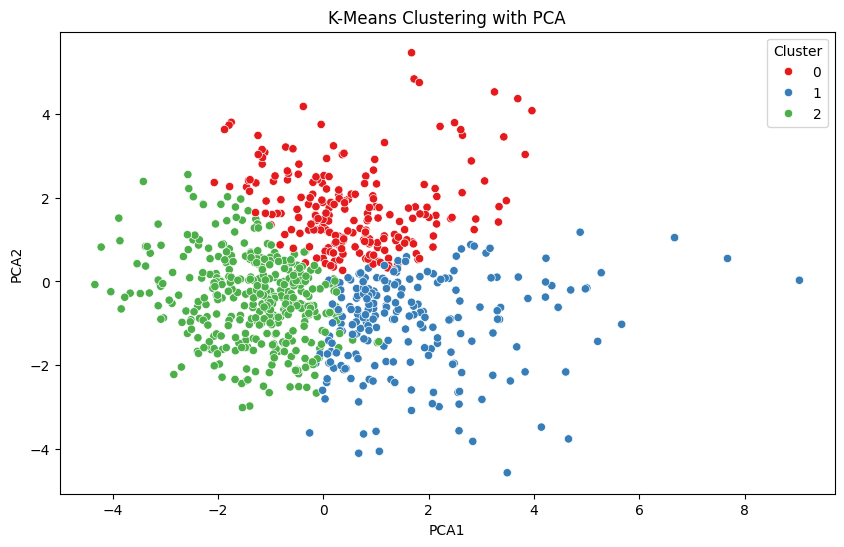

In [ ]:
# PCA for Visualization
pca= PCA(n_components=2)
X_pca= pca.fit_transform(X_scaled)
df['PCA1']= X_pca[:,0]
df['PCA2']= X_pca[:,1]
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering with PCA')
plt.show()